In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [12.00, 6.75]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Frekvensrespons for FIR filtre

* **Emne AIS2201 - Signalbehandling**
* **Uke 42, 2023**
* **Relevant Pensum:**
    * Kapittel 5.9 - 5.10 i Understanding Digital Signal Processing
    * Differansefilter kan leses mer om i kapittel 7.1
* **Underviser: Kai Erik Hoff**

# Tema 

* Oppsummering impulsrespons og konvolusjon
* Hva er frekvensrespons?
* Styrkegradsrespons
* Faserespons
* Presentasjon og tolking av frekvensrespons
* Transformasjon av filtre
* Utregning av frekvensrespons med DTFT

## Opppsummering Impulstrespons

* Alle LTI-system kan karakteriseres ved hjelp av systemets *impulsrespons*.

<img src="Figurer/11_Frekvensrespons/ImpulseResponse.png" style="width: 80%; margin-left: 100px" />

## Oppsummering konvolusjon

* Utgangssignalet $y[n]$ til ethvert LTI-system kan beregnes ved å utføre *lineær konvolusjon* mellom inngangssignalet $x[n]$ og impulsresponsen $h[n]$.

\begin{align}
y[n] &= x[n]*h[n]\\
&= \sum_{k=0}^{\infty}x[k]\cdot h[n-k]
\end{align}

Output()

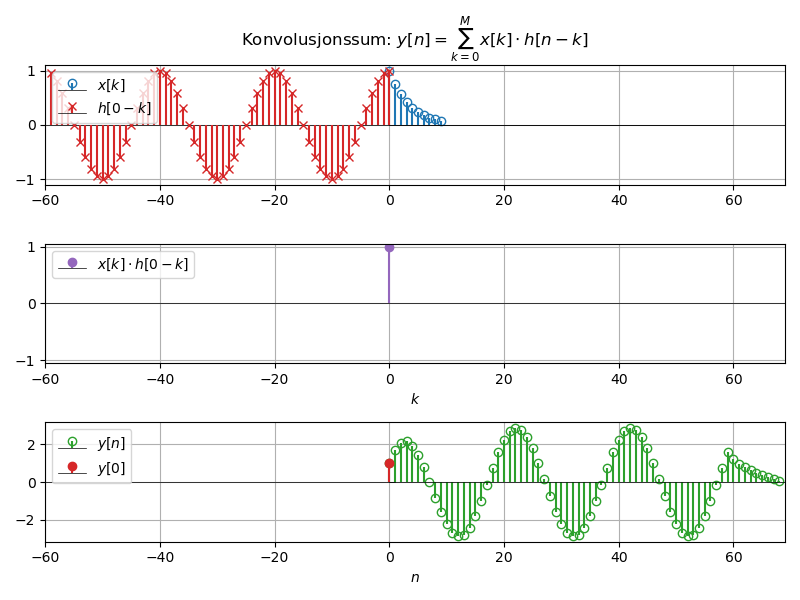

In [2]:
from Kildekode._10_Konvolusjon import convolutionDemo
n = np.arange(60); xn = np.cos(pi/10*n) # x[n] er en Sinussekvens
hn =  0.75**np.arange(10)               # h[n] = 0.75^n, 0 <= n < 10.
convolutionDemo(hn, xn, fig_num=1);    

# LTI-system og sinussekvenser

* Sinussignal inn $\rightarrow$ sinussignal ut.
    * Både inngangssignal og utgangssignal vil ha samme frekvens.
* Gitt inngangssignalet
$$x[n] = \cos\left(\hat{\omega}_0\cdot n\right)$$
så vil utgangssignalet
$$y[n] = A\cdot \cos\left(\hat{\omega}_0\cdot n +\phi\right)$$
    * Vi ønsker en enkel måte å finne ut hva den nye amplituden $A$ og fasen $\phi$ vil være.

# FIR Filtrering av en sinussekvens

* Utgangssignalet er en vektet sum av foregående inngangssampler:
$$y[n] = \sum_{k=0}^{M} b_k\cdot x[n-k]$$
    * Dette betyr at en sample fra inngangssignalet $x[n]$ som er $M$ sampler "gammelt" vil fortsatt påvirke utregnet utgangsverdi $y[n]$.
    * Utgangssignalet vil derfor "henge etter".
    
<img src="Figurer/11_Frekvensrespons/Fig1_Sine_ex1.png" style="width: 60%; margin-left: 100px" />

# Filtrert sinussekvens utledet
* Inngangssignal fra figur på forrige slide:
$$x[n] = \sin \left(\frac{2\pi}{16} \cdot n\right)$$
* Resulterende utgangssignal:
\begin{align}
y[n] &= 0.925\cdot \sin \left(\frac{2\pi}{16} \cdot (n-2) \right)\\
&= 0.925\cdot \sin \left(\frac{2\pi}{16} \cdot n -\frac{2\pi}{16}\cdot 2 \right)\\
&= 0.925\cdot \sin \left(\frac{\pi}{8} \cdot n -\frac{\pi}{4} \right)
\end{align}

## Regneeksempel 1:
* Et FIR filter er gitt ved impulsresponsen 
$$h[n] =\frac{1}{4}\delta[n] + \frac{1}{2}\delta[n-1] + \frac{1}{4}\delta[n-2]$$
* Filteret brukes til å filtrere et signal $x[n] = \cos\left(\frac{\pi}{2}\cdot n\right)$.
* Finn et uttrykk for utgangssignalet $y[n]$.

# Generell utledning for sinussekvenser
$$
\begin{align}
y[n] &= h[n]*x[n], \ \ \ x[n] = \cos(\hat{\omega}_0\cdot n)\\
&= h[n]*\cos(\hat{\omega}_0\cdot n)\\
&= \sum_{k=0}^{\infty}h[k]\cdot \cos(\hat{\omega}_0\cdot (n-k))\\
&= \sum_{k=0}^{\infty}h[k]\cdot \cos(\hat{\omega}_0\cdot n-\hat{\omega}_0\cdot k)\\
&= A\cos(\hat{\omega}_0\cdot n + \phi)
\end{align}
$$

$$\text{hvor vektoraddisjonsprinsippet gir:}$$



$$ 
\begin{align}
A\cdot e^{j\phi} &= \sum_{k=0}^{\infty}h[k]\cdot e^{-j\hat{\omega}_0\cdot k} \\
&= DTFT(h[n])\big|_{\hat{\omega}= \hat{\omega}_0}\\
&= H\left(\hat{\omega}_0 \right)
\end{align}
$$


#### Nøkkelegenskap:
* Sinussignalets amplitude og fase etter filtrering er bestemt av *impulsresponsens fouriertransform* i frekvensen $\hat{\omega} = \hat{\omega}_0$

# Filtrering av signal i frekvensplanet

* Et signal kan filtreres i frekvensplanet ved å *multiplisere* signalets *fouriertransform* med en *funkskjon* som vil manipulere *amplituden* og *fasen* til hver av frekvenskomponentene i signalet.
    * Fasejustering bestemmes av funksjonens vinkel i det komplekse plan.
    * Amplitudejustering bestemmes av funksjonens absoluttverdi i det komplekse plan.
    * Lignende filtrering har vi f.eks. utført med hjelp av FFT.

<img src="Figurer/11_Frekvensrespons/Fig2_FourierFilt.png" style="width: 80%; margin-left: 100px" />

# Digital Filtrering og fouriertransformasjon

$$x[n]*h[n] \stackrel{\mathrm{DTFT}}{\longleftrightarrow} X\left(\hat{\omega}\right)\cdot H \left(\hat{\omega}\right)$$ 

* *Konvolusjon* mellom et signal $x[n]$ og en impulsrespons $h[n]$ vil ha nøyaktig samme innvirkning på signalet som å multiplisere det fouriertransformerte signalet $X\left(\hat{\omega}\right)$ med ***frekvensresponsen*** $H\left(\hat{\omega}\right)$.
    * Alternativt forklart: istedenfor å transformere signalet $x[n]$ til frekvensplanet for å utføre filtrering, transformerer vi nå heller "filtreringsfunksjonen" $H\left(\hat{\omega}\right)$ til tidsplanet.
    * Ettersom filtrering i frekvensdomenet er en multiplikasjonsoperasjon, vil filterets egenskaper være lett å tyde ut ifra frekvensresponsen $H\left(\hat{\omega}\right)$.

# Styrkegrad- og faserespons

* Frekvensresponsen $H\left(\hat{\omega}\right)$ er en *kompleks funksjon* som forteller hvordan filteret vil påvirke enhver ren sinussekvens $x[n] = A\cdot \cos(\hat{\omega}_0\cdot n + \phi)$.
<img src="Figurer/11_Frekvensrespons/Fig3_LTI_SInusoid.png" style="width: 80%; margin-left: 100px" />

* Når vi analyserer filtre er det gunstig å kunne studere skaleringen og forskyvningen hver for seg. Disse to "komponentene" er kjent som amplituderesponsen og faseresponsen til et filter.
    * **Styrkegradsrespons** $\left|H\left(\hat{\omega}\right)\right|$
        * Forteller hvor mye en sinussekvens forsterkes/dempes, gitt digital frekvens $\hat{\omega}$.
    * **Faserespons** $\angle H\left(\hat{\omega}\right)$
        * Forteller hvor mange radianer sinussekvensen ut av filteret er forskjøvet i forhold til inngangssignalet, gitt digital frekvens $\hat{\omega}$.

# Styrkegradsrespons

* Angir filterets skalering av sinussekvenser med digital frekvens $\hat{\omega}$.

$$\left|H\left(\hat{\omega}\right)\right| = \frac{\left|Y\left(\hat{\omega}\right)\right|}{\left|X\left(\hat{\omega}\right)\right|}$$

* Lik symmetri rundt $\hat{\omega}=0$.
$$\left|H\left(\hat{\omega}\right)\right| = \left|H\left(-\hat{\omega}\right)\right|$$

<img src="Figurer/11_Frekvensrespons/Fig4_AmpResp.png" style="width: 80%; margin-left: 100px" />

# Faserespons
* Angir forsinkelsen av bølgeformen til en sinussekvens med digital frekvens $\hat{\omega}$ påført av filteret.
$$\angle H\left(\hat{\omega}\right) = \angle Y\left(\hat{\omega}\right) - \angle X\left(\hat{\omega}\right)$$
* Oppgitt i radianer. En faserespons på $\angle H\left(\hat{\omega}\right) =  -2\pi$ vil f.eks. tilsvare en forsinkelse på én signalperiode for signalkomponenten med frekvens $\hat{\omega}$.
* Odde symmetri rundt $\hat{\omega}=0$:
$$\angle H\left(\hat{\omega}\right) = -\angle H\left(-\hat{\omega}\right)$$

<img src="Figurer/11_Frekvensrespons/Fig5_PhaseResp.png" style="width: 80%; margin-left: 100px" />

## Demo: Frekvensrespons

Output()

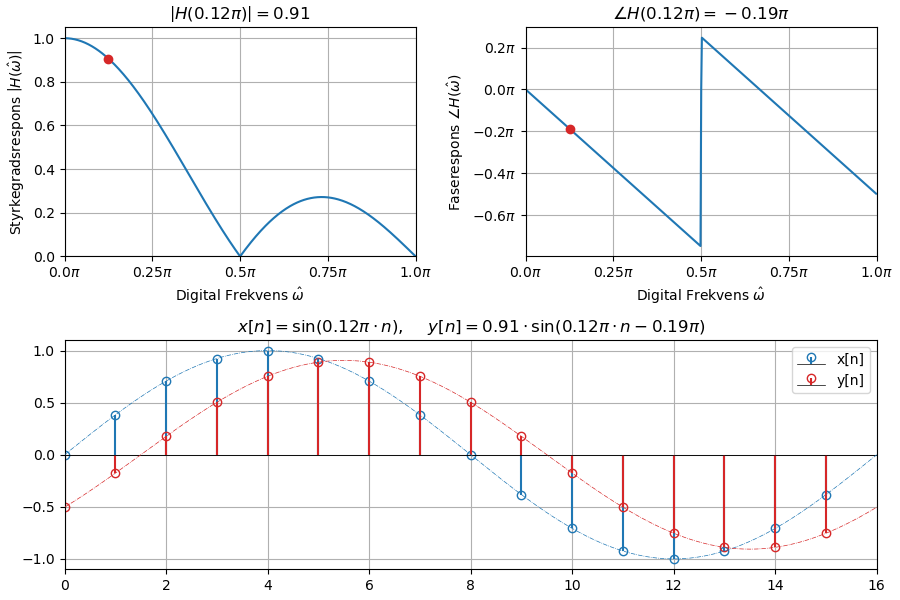

In [2]:
from Kildekode._11_Frekvensrespons import FreqRespDemo
hn = np.array([0.25, 0.25,0.25, 0.25])
FreqRespDemo(hn, figsize=(9,6), fig_num=2);

## Frekvensrespons i Python

* Kan regnes ut numerisk med funkskjonen [`freqz()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html). 
    * `freqz()` er ikke ulik `fft()`, men gir litt flere valgmuligheter.
* **Argument:**
    * `b`: Filterkoeffisienter $b_k$
    * `a`: Filterkoeffisienter $a_k$ (*for IIR-filtre, introduseres neste uke*)
    * `worN`: Antall datapunkter (*512 dersom annet ikke spesifisert*) 
* **Returverdier:**
    * `w`: Array med digitale frekvenser lineært fordelt mellom $0$ og $\pi$.
    * `Hw`: Array med filterresponser for frekvensene i `w`.

## Kodeeksempel:
1. I forrige time utledet vi et forslag til et differansefilter som også filtrerer bort høyfrekvent støy: 
$$h_1[n] = \frac{1}{6}\cdot \delta[n] - \frac{1}{6}\cdot \delta[n-6]$$
    * Quiz-spm: Hva er filterets filter-orden?
    * Regn ut og presenter frekvensresponsen til differansefilteret i to sub-plot.
    
    
2. Boka foreslår, basert på Richard Hamming sin formel (7-11) har vi følgende impulsrespons i kapittel 7.1.2 for et differansefilter med tilsvarende filterorden:
$$h_2[n] = -\frac{22}{252} \cdot \delta[n] + \frac{67}{252}\cdot \delta[n-1] + \frac{58}{252}\cdot \delta[n-2] - \frac{58}{252}\cdot \delta[n-4] - \frac{67}{252}\cdot \delta[n-5] + \frac{22}{126} \cdot \delta[n]$$
    * Vis frekvensresponsen til dette filteret i samme figur som $h_1[n]$ og sammenlign.
    
    
3. Sammenlign med et "idéelt" derivasjonsfilter og kommenter.

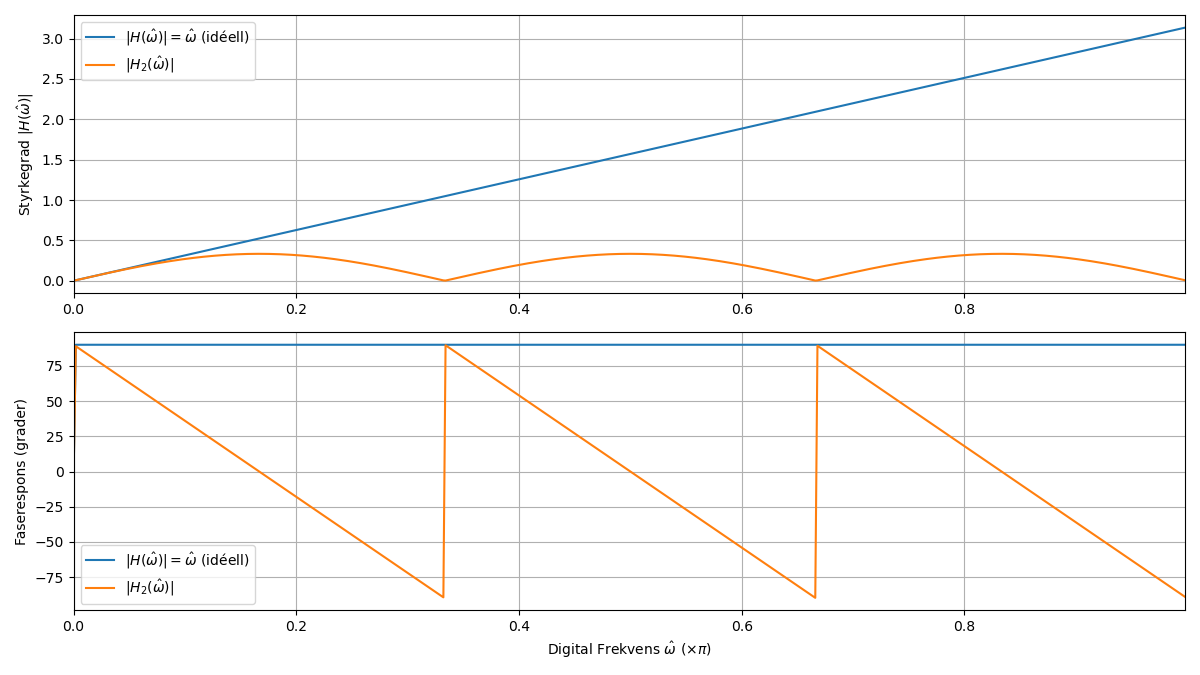

In [10]:
# Ideell frekvensrespons
w = np.linspace(0, np.pi, 512, endpoint=False)
Hw = 1j*w

# Sjetteordens differansefilter:
w, H2w = sig.freqz([1/6, 0, 0, 0, 0, 0, -1/6])

plt.close(3);plt.figure(3)
plt.subplot(2,1,1)
plt.plot(w/np.pi, np.abs(Hw), label= r'$|H(\hat{\omega})| = \hat{\omega}$ (idéell)')
plt.plot(w/np.pi, np.abs(H2w), label= r'$|H_2(\hat{\omega})|$')
plt.ylabel('Styrkegrad $|H(\hat{\omega})|$')
plt.legend()

plt.subplot(2,1,2)
plt.plot(w/np.pi, np.rad2deg(np.angle(Hw)), label= r'$|H(\hat{\omega})| = \hat{\omega}$ (idéell)')
plt.ylabel('Faserespons (grader)')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')
plt.plot(w/np.pi, np.rad2deg(np.angle(H2w)), label= r'$|H_2(\hat{\omega})|$')
plt.legend();

Text(0.5, 0, 'Digital Frekvens $\\hat{\\omega} \\ (\\times \\pi)$')

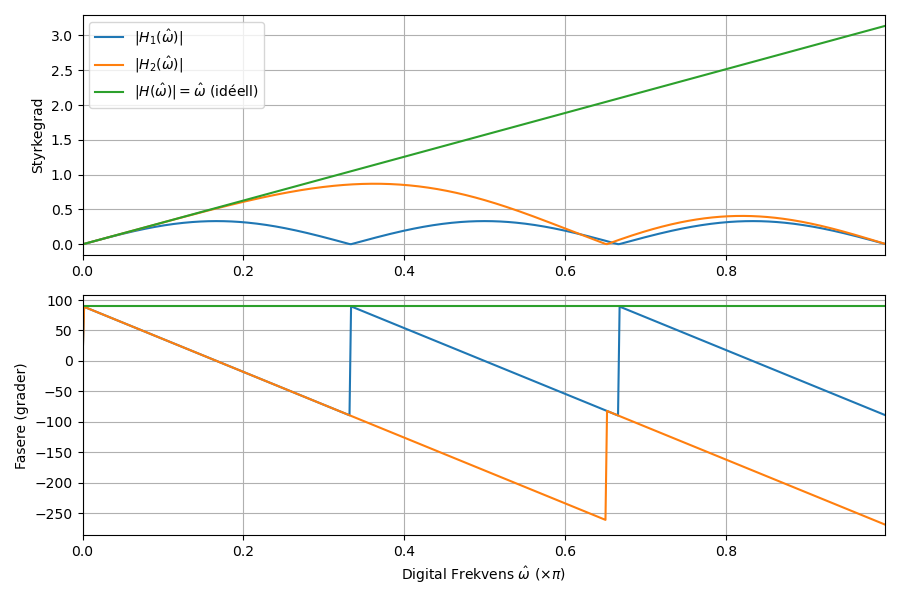

In [5]:
hn = np.array([1/6, 0, 0, 0, 0, 0, -1/6]) # 6-punkt middelverdi og førsteordens differanse i kaskade
w, Hw = sig.freqz(b = hn)

Hw_amp = np.abs(Hw)
Hw_phase = np.unwrap(np.angle(Hw))

h2n = np.array([-22, 67, 58, 0, -58, -67, 22])/252 # Alternativt differansefilter med demping av høyfrekvent innhold
w, H2w = sig.freqz(b = h2n)

H2w_amp = np.abs(H2w)
H2w_phase = np.unwrap(np.angle(H2w))

#----------------------------
# Plotting av frekvensrespons
# ---------------------------
plt.close(3); plt.figure(3, figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(w/pi, Hw_amp, label=r'$|H_1(\hat{\omega})|$')
plt.plot(w/pi, H2w_amp, label=r'$|H_2(\hat{\omega})|$')
plt.plot(w/pi, w, label= r'$|H(\hat{\omega})| = \hat{\omega}$ (idéell)')
plt.legend()
plt.ylabel('Styrkegrad')
plt.subplot(2,1,2)
plt.plot(w/pi, np.rad2deg(Hw_phase), label=r'$|H_1(\hat{\omega})|$')
plt.plot(w/pi, np.rad2deg(H2w_phase), label=r'$|H_2(\hat{\omega})|$')
plt.plot(w/pi, 90*np.ones(len(w)), label= r'$|H(\hat{\omega})| = \hat{\omega}$ (idéell)')
plt.ylabel('Fasere (grader)')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')


## Regneeksempel 2:

<img src="Figurer/11_Frekvensrespons/Fig6_Example2.png" width="50%" />

# Group delay

* Deriverte av faseresponsen $\angle H(\hat{\omega})$
$$ D(\hat{\omega}) = -\frac{d \angle H(\hat{\omega})}{d \hat{\omega}}$$
* Forteller *antall sampler* forsinkelse gitt som funksjon av frekvens

/opt/conda/lib/python3.10/site-packages/scipy/signal/_filter_design.py:686: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
/tmp/ipykernel_84/544432360.py:2: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = sig.group_delay((hn, [1]));


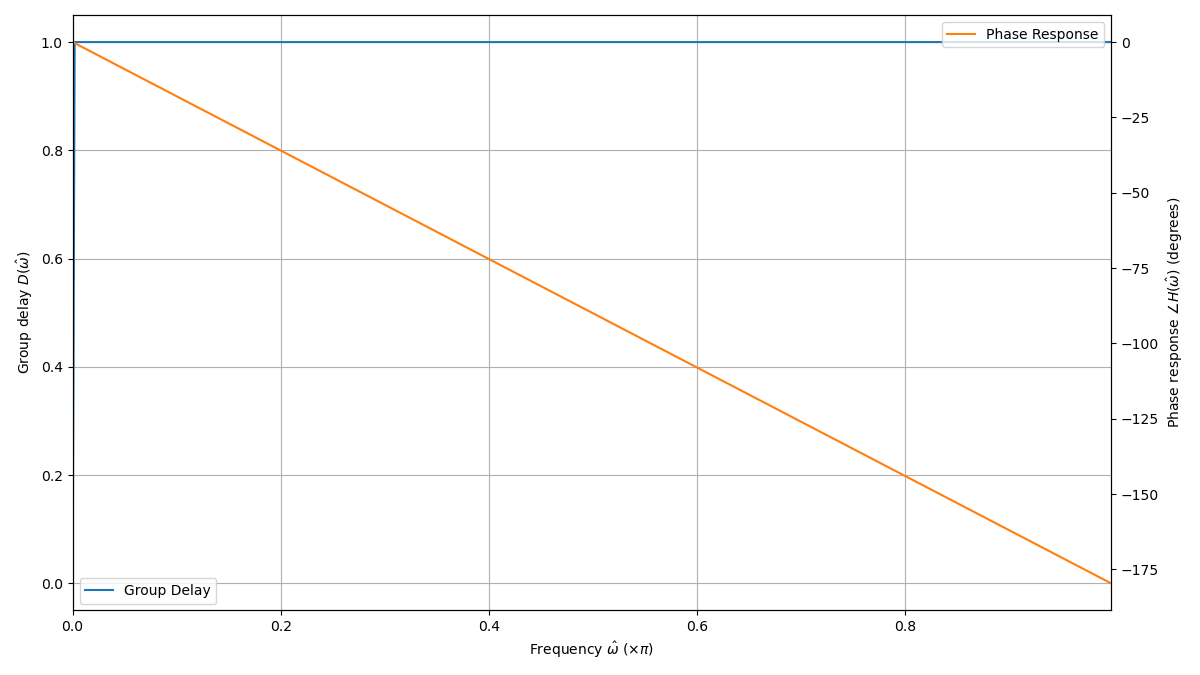

In [6]:
hn = np.array([-0.25, 0.5, -0.25])  # 
w, gd = sig.group_delay((hn, [1]));
w, Hw = sig.freqz(b=hn)
plt.close(4);plt.figure(4)
plt.plot(w/np.pi, gd, label="Group Delay")
plt.xlabel(r"Frequency $\hat{\omega}$ ($\times \pi$)")
plt.ylabel(r"Group delay $D(\hat{\omega})$")
plt.legend()
plt.twinx()
plt.plot(w/np.pi, np.unwrap(np.angle(Hw))/np.pi*180, 'C1', label="Phase Response")
plt.ylabel(r"Phase response $\angle H(\hat{\omega})$ (degrees)")
plt.grid(False)
plt.legend()

* I mange anvendelsesområder så er en *uniform* group delay ønsket.
    * Prosessering av lyd
        * Ulik forskyvning av ulike frekvenser kan medføre et ganske annet lydbilde

# Oppsummering frekvensrespons
* Frekvensresponsen til et digitalt filter identifiseres ved å finne *frekvensinnholdet* $H(\hat{\omega})$ til filterets impulsrespons $h[n]$.
    * Kan utføres analytisk med *Diskret-Tids FourierTransformasjon*
    $$H\left(\hat{\omega} \right) = \text{DTFT}(h[n]) = \sum_{n=0}^{\infty} h[n]\cdot e^{-j\hat{\omega}\cdot n}$$
    * Kan utføres numerisk i `python` med funksjonen `scipy.signal.freqz()`:
```python
w, Hw = scipy.signal.freqz(hn)
```
* Frekvensesponsen $H(\hat{\omega})$ Deles opp i **Styrkegradsrespons** $|H(\hat{\omega})|$ og **Faserespons** $\angle H(\hat{\omega})$
    * **Styrkegradsrespons** forteller hvor mye en sinussekvens forsterkes/dempes, gitt digital frekvens $\hat{\omega}$.
    * **Faserespons** forteller hvor mange radianer sinussekvensen ut av filteret er forskjøvet i forhold til inngangssignalet, gitt digital frekvens $\hat{\omega}$.

* Frekvensresponsen beskriver forholdet mellom inngangssignal og utgangssignal til et filter i frekvensplanet.
$$Y\left(\hat{\omega} \right) = X\left(\hat{\omega} \right)\cdot H\left(\hat{\omega} \right) \leftrightarrow H\left(\hat{\omega} \right) = \frac{Y\left(\hat{\omega} \right)}{X\left(\hat{\omega} \right)}$$
* Forteller hvordan filteret vil påvirke et hvilket som helst sinusformet signal:
\begin{align}
x[n] &=  A\cdot \cos(\hat{\omega}_0 \cdot n + \phi)\\
& \downarrow \\
y[n] &= \left| H\left(\hat{\omega}_0 \right)\right| \cdot A\cdot \cos\left(\hat{\omega}_0 \cdot n + \phi + \angle H\left(\hat{\omega}_0 \right)\right)
\end{align}



* Vi kan gjøre endringer på frekvensresponsen til et filter ved å utføre enkelte operasjoner på impulsresponsen $h[n]$:
    * Modulasjon: $h[n] \cdot \cos(\hat{\omega}_0\cdot n) \rightarrow \frac{1}{2}(H(\hat{\omega}+\hat{\omega}_0) + H(\hat{\omega}+\hat{\omega}_0))$
    * Addisjon: $h_1[n] + h_2[n] \rightarrow H_1(\hat{\omega}) + H_2(\hat{\omega})$
    * Kaskade: $h_1[n]*h_2[n] \rightarrow H_1(\hat{\omega}) \cdot H_2(\hat{\omega})$
    * Invertering av frekvensrespons (komplementærfilter)
        * Spesialtilfelle for FIR filtre med lineær faserespons
        * $\delta\left[n-\frac{M}{2}\right] - h[n] \rightarrow \left| 1 - H(\hat{\omega}) \right|, \ \ \ M = \text{filterorden}$

# Spørsmål?